> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **in this project i focused on human interests whether they are producers or audience so these are what i'm questioning about**:

**Q1 would people vote a movie with low revenue?**

**Q2 what are the lowest and highest movie rate, revenue, vote count? and what are their genres?**

**Q3 what are the Frequent Genres the people and the industry like to watch/produce?**

**Q4 do short movies & normal movies differ through years?**

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
pd.set_option('display.max_columns', None) #to display all the columns' names
#df.head(3)
#df.tail()


In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe() #remember to fix the dtype of "release_year"...years doesn't count blash...zaka2 :)))

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Data Cleaning (Replace this with more specific notes!)

#### remember Data cleaning include:1-getting & droping duplicats,2-handlin missing values(fillna)& 3-fixing dtypes

#### 1- dropping duplicates

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
#df.duplicated().sum() #rechecking

In [9]:
to_be_dropped=['id','imdb_id','popularity','budget','homepage','keywords','overview','budget_adj','revenue_adj']
df= df.drop(to_be_dropped,axis=1)
df.head() #لما بيطلعلي ايرور بيبقى عشان الداتا اتمسحت ف مش لاقي حاجة زيادة بالإسم الفلاني عشان يتمسح من الأصل,اعملي restart kernel عشان تتجنبي منظر الايرور

,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


#### 2- checking & handling missing , 0 and NAN values

In [8]:
print(df['revenue'].min())
df.query('revenue == 0')

df['revenue'] = df['revenue'].replace(0, np.NAN)
df.dropna(subset= ['revenue'], inplace= True)

# i replaced zeros with NaN because it will be easier to eliminate them and faster by dropna func.

print(df.shape)

0
(4849, 21)


In [9]:
df['runtime'].min()
df.query('runtime == 15')
#'runtime' passed the 0 check

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5162,24914,tt0368574,0.208637,10,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,NaN,Shinichiro Watanabe,NaN,NaN,A high school student is haunted by thoughts o...,15,Science Fiction|Animation,Studio 4Â°C,6/2/03,16,6.8,2003,11.853526,5.926763


In [10]:
df['original_title'].isnull().sum() #passed

0

In [11]:
#FIXING INDECES AFTER THE DROPNA()
df.reset_index(drop=True, inplace=True)

#### 3- fixing datatypes

In [12]:
df.dtypes 

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                 float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [13]:
df['revenue'] = df['revenue'].astype(np.int64) #numpy's int64

In [14]:
df['revenue'].tail() ##MAmma mia the index resetting worked :3

4844    33736689
4845    13000000
4846     6000000
4847    20000000
4848    12000000
Name: revenue, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1- random exploring

In [15]:
df.describe() #i don't know why but describe function doesn't alter revenue values to int although it's so when using any other mathematical and statistical function

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


## Q1 would people vote a movie with low revenue?

##### in this analysis i would like to know if people have the interest to rate a low revenue movie and i would like represent the difference and the ratio of it both numerically AND graphically on average

In [16]:
median_rev=df['vote_average'].median()
print(median_rev) #for testing
low_rev=df.query('vote_average < {}'.format(median_rev)) 
high_rev=df.query('vote_average >= {}'.format(median_rev))
 
mean_vote_low = int(low_rev['vote_count'].mean()) #i casted to integer because there's no 231.4 human :)
mean_vote_high = int(high_rev['vote_count'].mean())

mean_vote_low,mean_vote_high #avg people who would rate low revenue movie vs high

6.2


(231, 629)

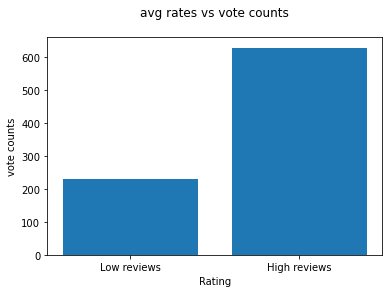

In [17]:
locations = [1, 2]
heights = [mean_vote_low, mean_vote_high] #values
labels = ['Low reviews', 'High reviews']
plt.bar(locations, heights, tick_label=labels)
plt.title('avg rates vs vote counts\n')
plt.xlabel('Rating')
plt.ylabel('vote counts'); 

### in that bar graph : average number of people who would rate a low revenue movie is 231 while people who liked the movies were interested to rate them high.

### their avg number is more than double the low reviews people! they counted 625 on average.

## Q2 what are the lowest and highest movie rate, revenue, vote count? and what are their genres?

In [35]:
df.head(1)

,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


#### 1st:lowest & highest revenue

In [19]:
max_rev=df['revenue'].max()
min_rev=df['revenue'].min()
df.query('revenue == {}'.format(max_rev))


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
468,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [46]:
df.query('revenue == {}'.format(min_rev))

,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2111,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,NaN,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,11/14/03,46,6.4,2003
3566,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,They're not there to shop. They're not there t...,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,10/20/95,201,6.8,1995


#### 2nd :lowest & highest votes

In [49]:
max_vot_avg=df['vote_average'].max()
min_vot_avg=df['vote_average'].min()
df.query('vote_average == {}'.format(max_vot_avg))

,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1718,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,142,Drama|Crime,Castle Rock Entertainment,9/10/94,5754,8.4,1994
3446,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,Why stop making sense? Why a movie? Why a big ...,88,Documentary|Music,Talking Heads|Arnold Stiefel Company,11/16/84,23,8.4,1984


In [50]:
df.query('vote_average == {}'.format(min_vot_avg))

,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3122,9109322,Superbabies: Baby Geniuses 2,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...,Bob Clark,Meet the new generation of superheroes.,88,Family|Comedy,Crystal Sky Worldwide|Triumph Films,8/27/04,11,2.1,2004


#### 3rd: highest & lowest count of votes

In [181]:
max_vot_count=df['vote_count'].max()
min_vot_count=df['vote_count'].min()
df.query('vote_count == {}'.format(max_vot_count))


,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
668,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Your mind is the scene of the crime.,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010


In [55]:
df.query('vote_count == {}'.format(min_vot_count))

,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
215,732655,Once I Was a Beehive,Paris Warner|Lisa Clark|Hailey Smith|Clare Nie...,Maclain Nelson,NaN,119,Comedy|Drama|Family,Escapology|Main Dog Productions,8/14/15,10,6.5,2015
467,102000000,The Goodbye Girl,Richard Dreyfuss|Marsha Mason|Quinn Cummings|P...,Herbert Ross,Thank you Neil Simon for making us laugh at fa...,111,Comedy|Romance,Rastar Pictures|Metro-Goldwyn-Mayer (MGM),11/30/77,10,6.5,1977
659,56000,Beautiful,Deborra-Lee Furness|Peta Wilson|Aaron Jeffery|...,Dean O'Flaherty,NaN,97,Drama|Mystery|Thriller,Kojo Pictures,4/27/09,10,4.4,2009
871,10967,Peep World,Michael C. Hall|Sarah Silverman|Rainn Wilson|B...,Barry W. Blaustein,NaN,79,Comedy,NaN,9/15/10,10,4.9,2010
873,22270,Ceremony,Uma Thurman|Michael Angarano|Lee Pace|Rebecca ...,Max Winkler,He's the love of her life. She just doesn't kn...,89,Comedy|Romance,NALA Films,10/8/10,10,5.7,2010
879,5980,BearCity,Joe Conti|Gerald McCullouch|Stephen Guarino|Al...,Douglas Langway,Romance can be hairy,103,Comedy|Romance,TLA Releasing,6/8/10,10,5.5,2010
976,14011454,In Too Deep,Omar Epps|LL Cool J|Nia Long|Stanley Tucci|Hil...,Michael Rymer,NaN,97,Drama|Action|Thriller|Crime,Suntaur Entertainment Company,8/25/99,10,6.5,1999
998,2049595,Trick,Tori Spelling|Christian Campbell|John Paul Pit...,Jim Fall,A story about two guys trying to make it in th...,89,Comedy|Romance,Fine Line Features,7/23/99,10,6.5,1999
1116,4186931,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,Nicole Holofcener,NaN,91,Comedy|Drama|Romance,NaN,8/31/01,10,6.3,2001
1128,163169,Down,Naomi Watts|James Marshall|Michael Ironside|Ed...,Dick Maas,YOUR NEXT STOP... IS HELL.,111,Action|Horror|Mystery|Thriller,First Floor Features,5/11/01,10,3.7,2001


### we conclude from these answers that genres somehow HAS effect on people's and producers opinions and decision!! so in the next question, i'll discuss deeper their ratios and numbers

## Q3 what are the Frequent Genres the people and the industry like to watch/produce?


In [219]:
def genre_splitter(col):
    '''  This Function takes a column (which will be 'genre' or 'director')
        and its output is the genres/directors and their counts,
        note: genres count is high as there's > 1 genre per 1 movie
    '''
    datum = df[col].str.cat(sep = '|')
    datum = pd.Series(datum.split('|'))
    count = datum.value_counts(ascending = True)
    return count

genre_count = genre_splitter('genres')
genre_count

#directors= genre_splitter('director') #the directors case in case of reviewer's testing
#directors

TV Movie              1
Foreign              31
Western              65
Documentary         102
War                 137
History             153
Music               186
Animation           237
Mystery             410
Fantasy             461
Family              513
Horror              561
Science Fiction     586
Crime               773
Adventure           843
Romance             877
Action             1260
Thriller           1423
Comedy             1771
Drama              2274
dtype: int64

### now i'll represent it graphically

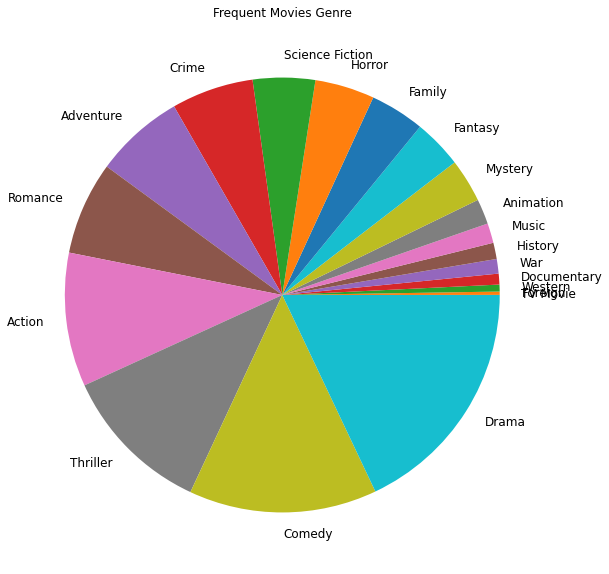

In [220]:
plt.figure(figsize = (10, 10))
plt.title('Frequent Movies Genre')
genre_data=['TV Movie','Foreign','Western','Documentary','War','History','Music','Animation','Mystery','Fantasy','Family','Horror','Science Fiction','Crime','Adventure','Romance','Action','Thriller','Comedy','Drama']
plt.pie(genre_count, labels = genre_data, textprops = {'fontsize':12})

plt.show()

### in this Pie plot it's SO OBVIOUS that the drama, comedy, thriller and action really have people's interest and attraction, that also mean that they were the highest revenue out there, and from the last question we deduce also that the highest revenues represent the audience as we concluded that most audience **reivew**  what they watch!

## Q4 do short movies & normal movies differ through years?

#### in this Question i decided to split short movies and make its own graph
#### i made a research concerning how long is it to consider a movie a with a category "short movie" and i found out this:
#### "short movies"  are a type of movies that has a runtime less than 40 minutes including credits time
#### as it's a different type of movies i will graph it separately

102.25

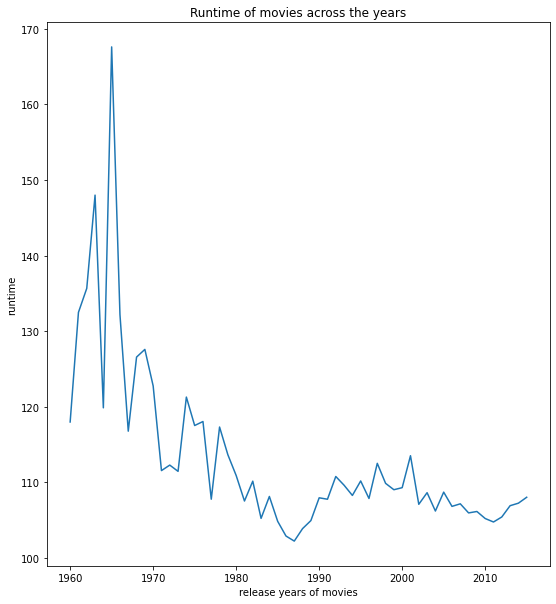

In [229]:
Not_short_movies=df.query('runtime > 40')
time_per_year = Not_short_movies.groupby('release_year')['runtime'].mean()

plt.figure(figsize=(9,10)) 
# making the graph "tall" because theere are many time spans(as minutes), but there's less for the years one :)
plt.xlabel('release years of movies', fontsize = 10)
plt.ylabel('runtime', fontsize = 10)
plt.title('Runtime of movies across the years')

plt.plot(time_per_year)
plt.show()


### back in the 60s and 70s normal-length movies used to be so long that the average movie had a 167 mins. runtime including credits! ,

### Later in the mid of 80s that took a turn and the avg movie took 102 mins.


In [ ]:
#this space was for testing long movies runtime numerically

#time_per_year_max = Not_short_movies.groupby('release_year')['runtime'].mean().max()
#time_per_year_max #167.6 mins
#time_per_year_min = Not_short_movies.groupby('release_year')['runtime'].mean().min()
#time_per_year_min #102 min


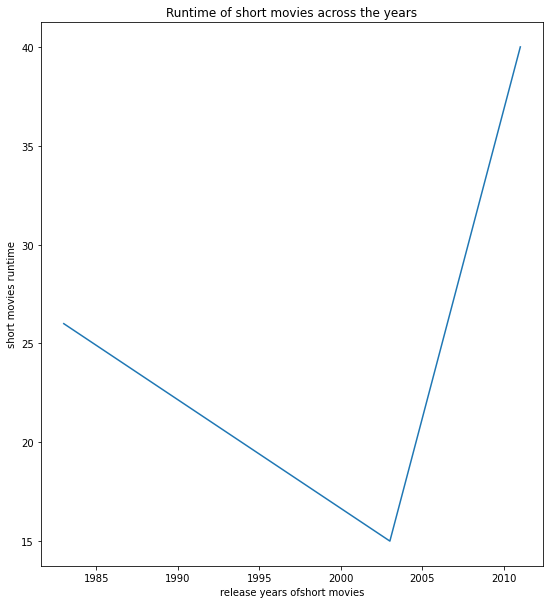

In [174]:
short_movies=df.query('runtime <= 40')
time_per_year_short = short_movies.groupby('release_year')['runtime'].mean()

plt.figure(figsize=(9,10))
plt.xlabel('release years ofshort movies', fontsize = 10)
plt.ylabel('short movies runtime', fontsize = 10)
plt.title('Runtime of short movies across the years')

plt.plot(time_per_year_short)
plt.show()



### as for the short movies they were the opposite of the long movies!!! producers and movie makers increased their time recently since the mid 80s and that also included the credits time.


In [172]:
short_movies.groupby('release_year')['runtime'].mean() #just some random testing 

release_year
1983    26.0
2003    15.0
2011    40.0
Name: runtime, dtype: float64

<a id='conclusions'></a>
## Conclusions

> i was interested in people behaviours towards movies and their acting around various criteria considering movies so i focused on making intuitions and answering them:

**1st: average number of people who would rate a low revenue movie is 231 while people who liked the movies were intereted to rate them high**

**2nd: visually and numerically Drama (comes first), Comedy, Thriller and action got the MOST attention from audience AND the movies makers, while TV movies and foriegn don't get much attention**

**so if you want to guarantee a movie that you would like with other people the algorithm recommends
1- drama, 2-comedy, 3-thriller, 4-action
**

**3rd:
movies runtime through years:**

**back in the 60s and 70s normal movies used to be so long that the average movie had a 167 mins. runtime,
later in the mid of 80s that took a turn and the avg movie took 102 mins.
as for the short movies they were the opposite of the long movies!!! they increased their time recently since the mid 80s**

Dataset investigated: tmdb_movies.csv

Questions i proposed:
Q1 how many people would vote a movie even though it has low rate?
Q2 lowest and highest movie rate, revenue, vote count
Q3 Frequent Genres
Q4 do short movies & normal movies differ through years?


in data wrangling, there was a lot of 0 and NaN data that didn't make sense 
and that would make some calculations messy and not accurate as i want
so i eliminated these rows,

also there were columns that didn't interest my curiousity and were okay to delete
, there were merely no duplicates, i found only one.

after the elimination of some useless 0 and NaN rows i fixed the indeces by **reset_index()** as the function **dropna()** doesn't fix it by defualt nor have the option to

